# Regularyzacja regresji liniowej

In [26]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import numpy as np
#from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

In [27]:
# Load datasets
dataset = pd.read_csv('boston.csv')

X = dataset.drop('MEDV', axis=1)
y = dataset['MEDV']

In [28]:
# Zad. 1
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15)

In [29]:
# Zad. 2
# Create model, learn and predict on test data

# Create linear regressor
regr = LinearRegression()
 
# Fit the model to train data
regr.fit(X_train, y_train)

# Predict values on test data after learing
y_predicted = regr.predict(X_test)

In [30]:
# Score
score_train = regr.score(X_train, y_train)
print('Score - train data = {}'.format(score_train))

score_test = regr.score(X_test, y_test)
print('Score - test data = {}'.format(score_test))

Score - train data = 0.7616006663359856
Score - test data = 0.6745262578855173


#### Overfit data

In [31]:
# Normalize data
scaler = StandardScaler()
X = scaler.fit_transform(np.float64(X))

In [32]:
# Aproximation with second order polynomial
poly = PolynomialFeatures(2)
X = poly.fit_transform(X)

In [33]:
# Split data once again
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15)

In [34]:
# Fit the model to train data
regr.fit(X_train, y_train)

# Predict values on test data after learing
y_predicted = regr.predict(X_test)

# Score
score_train = regr.score(X_train, y_train)
print('Score - train data = {}'.format(score_train))

score_test = regr.score(X_test, y_test)
print('Score - test data = {}'.format(score_test))

Score - train data = 0.8476526904046103
Score - test data = 0.4091918681255783


In [35]:
# Zad. 4
# Ridge regularization
ridge_reg = Ridge(alpha=10)
ridge_reg.fit(X_train, y_train)

# Score
score_train = ridge_reg.score(X_train, y_train)
print('Score - train data = {}'.format(score_train))

score_test = ridge_reg.score(X_test, y_test)
print('Score - test data = {}'.format(score_test))

Score - train data = 0.9205928003665496
Score - test data = 0.8418304067633557


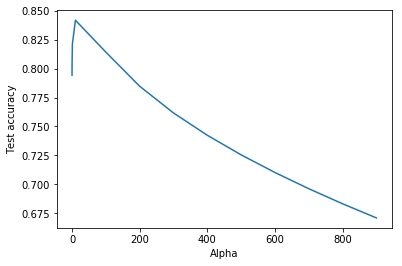

In [36]:
# Draw plot with accuracy against 'alpha' parameter
acc_ridge = []
alphas = []
for i in range(-3, 3):
    alphas.append(10**i)
    ridge_reg = Ridge(alpha=10**i)
    ridge_reg.fit(X_train, y_train)
    acc_ridge.append(ridge_reg.score(X_test, y_test))

for i in range(200, 1000, 100):
    alphas.append(i)
    ridge_reg = Ridge(alpha=i)
    ridge_reg.fit(X_train, y_train)
    acc_ridge.append(ridge_reg.score(X_test, y_test))
    
plt.figure()
plt.plot(alphas, acc_ridge)
plt.xlabel('Alpha')
plt.ylabel('Test accuracy')
plt.show()

In [37]:
# Lasso regression
acc_lasso = []
alphas_lasso = []
for i in range(1, 101):
    alphas_lasso.append(i*0.01)

for alpha in alphas_lasso:
    lasso_reg = Lasso(alpha, max_iter=10000)
    lasso_reg.fit(X_train, y_train)
    acc_lasso.append(lasso_reg.score(X_test, y_test))

best_lasso_alpha = alphas_lasso[np.argmax(acc_lasso)] 
lasso_reg = Lasso(alpha=best_lasso_alpha, max_iter=10000)
lasso_reg.fit(X_train, y_train)

print('Best Lasso\'s "alpha" is {}'.format(best_lasso_alpha))
print('Train score {}'.format(lasso_reg.score(X_train, y_train)))
print('Test score {}'.format(lasso_reg.score(X_test, y_test)))

Best Lasso's "alpha" is 0.04
Train score 0.9133373182165021
Test score 0.8359811214471699


# Regularyzacja regresji logistycznej

In [43]:
import os
path = os.getcwd() + '/breast_cancer.txt'
dataset = pd.read_csv(path, header=None, names=['ID', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class'])

In [44]:
# Replace 2 - benign and 4 - malignant to 0 - benign and 1 - malignant
dataset['Class'].replace(2, 0, inplace=True)
dataset['Class'].replace(4, 1, inplace=True)

In [54]:
dataset

,ID,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,NaN,1.0,1,1.0,2.0,1,3,1.0,1.0,0
1,1002945,5.0,4.0,4,5.0,7.0,10,3,2.0,1.0,0
2,1015425,3.0,1.0,1,1.0,2.0,2,3,1.0,1.0,0
3,1016277,6.0,8.0,8,1.0,3.0,4,3,7.0,1.0,0
4,1017023,4.0,1.0,1,3.0,2.0,1,3,1.0,1.0,0
5,1017122,8.0,10.0,10,8.0,7.0,10,9,7.0,1.0,1
6,1018099,1.0,1.0,1,1.0,2.0,10,3,1.0,1.0,0
7,1018561,2.0,1.0,2,1.0,2.0,1,3,1.0,1.0,0
8,1033078,2.0,1.0,1,1.0,2.0,1,1,1.0,5.0,0
9,1033078,4.0,2.0,1,1.0,2.0,1,2,1.0,1.0,0


In [55]:
# Zad. 1
# Check whether there is some data missing
dataset.isnull()
for column in dataset.columns:
    if column is 'ID' or column is 'Class':
        continue
    dataset[column].fillna(dataset[column].mean(), inplace=True)

In [63]:
# Zad. 2
# Extract labels and target values
X = dataset[dataset.drop(['ID', 'Class'], axis=1).columns]
y = dataset['Class']

In [65]:
# Zad. 3
# Split data to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [70]:
# Zad. 4
# Create logistic regressor
from sklearn.linear_model import LogisticRegression
log_regr = LogisticRegression(penalty='l1', C=1)

# Train
log_regr.fit(X_train, y_train)

# Accuracy
print('Accuracy = {}'.format(log_regr.score(X_test, y_test)))

Accuracy = 0.9619047619047619


/home/bartek/.envs/learning_env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best "C" value is 0.5 with accuracy 0.9666666666666667


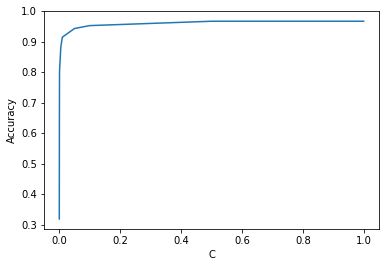

In [75]:
# Zad. 5
# Test different 'C' parameters
c_list = [0.0001, 0.0005, 0.0008, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]
acc = []
for c in c_list:
    log_regr = LogisticRegression(penalty='l2', C=c, solver='liblinear')
    log_regr.fit(X_train, y_train)
    acc.append(log_regr.score(X_test, y_test))

best_c = c_list[np.argmax(acc)]
log_regr = LogisticRegression(penalty='l2', C=best_c, solver='liblinear')
log_regr.fit(X_train, y_train)
accu = log_regr.score(X_test, y_test)
print('Best "C" value is {} with accuracy {}'.format(best_c, accu))

plt.figure()
plt.plot(c_list, acc)
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.show()

# Regularyzacja algorytmu kNN

In [76]:
from sklearn.neighbors import KNeighborsClassifier

In [94]:
# Test kNN classifier accuracy over 'k' nearest neighbors value
acc = []
k_list = np.linspace(1, 30, 30, dtype=np.uint8)
for k in k_list:
    knn_cls = KNeighborsClassifier(n_neighbors=k)
    knn_cls.fit(X_train, y_train)
    acc.append(knn_cls.score(X_test, y_test))

best_k = k_list[np.argmax(acc)]
knn_cls = KNeighborsClassifier(n_neighbors=best_k)
knn_cls.fit(X_train, y_train)
accu = knn_cls.score(X_test, y_test)
print('Best "k" is {} with accuracy {}'.format(best_k, accu))

Best "k" is 3 with accuracy 0.9761904761904762


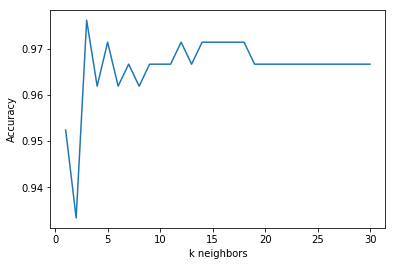

In [95]:
# Plot accuracy against 'k' value
plt.figure()
plt.plot(k_list, acc)
plt.xlabel('k neighbors')
plt.ylabel('Accuracy')
plt.show()

# Regularyzacja drzew deycyzyjnych

In [96]:
from sklearn import tree

In [101]:
# Test tree classifier accuracy over depth of the tree
depths_list = np.linspace(1, 100, 100, dtype=np.uint8)
acc = []
for depth in depths_list:
    tree_clf = tree.DecisionTreeClassifier(max_depth=depth)
    tree_clf.fit(X_train, y_train)
    acc.append(tree_clf.score(X_test, y_test))
    
best_depth = depths_list[np.argmax(acc)]
tree_clf = tree.DecisionTreeClassifier(max_depth=best_depth)
tree_clf.fit(X_train, y_train)
accu = tree_clf.score(X_test, y_test)
print('Best "depth" is {} with accuracy {}'.format(best_depth, accu))

Best "depth" is 10 with accuracy 0.9523809523809523


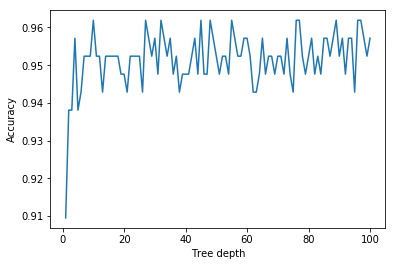

In [102]:
# Plot
plt.figure()
plt.plot(depths_list, acc)
plt.xlabel('Tree depth')
plt.ylabel('Accuracy')
plt.show()